Árbol de Decisión con ocrdataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Cargar dataset

In [5]:

df = pd.read_csv("D:\MAXITEL\Escritorio\ginger\MAESTRIA\INTELIGENCIA ARTIFICIAL\proyecto-ml-telecom\Supervisado/ocrdataset.csv")

Separar características (X) y etiquetas (y)

In [6]:
X = df.iloc[:, :-1]                      # todas menos la última columna
y = df.iloc[:, -1].astype(str).values    # última columna (etiquetas)


Dividir en entrenamiento y prueba

In [7]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

 One-hot encoding para variables categóricas

In [8]:
X_train_enc = pd.get_dummies(X_train)
X_test_enc = pd.get_dummies(X_test)

Alinear columnas entre train y test

In [9]:
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

Crear y entrenar modelo de Árbol de Decisión

In [10]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_enc, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


 Predicciones

In [11]:
y_pred = clf.predict(X_test_enc)

 Evaluación


In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Reporte de Clasificación:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       110
        Poor       1.00      1.00      1.00         8

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



Visualización del árbol


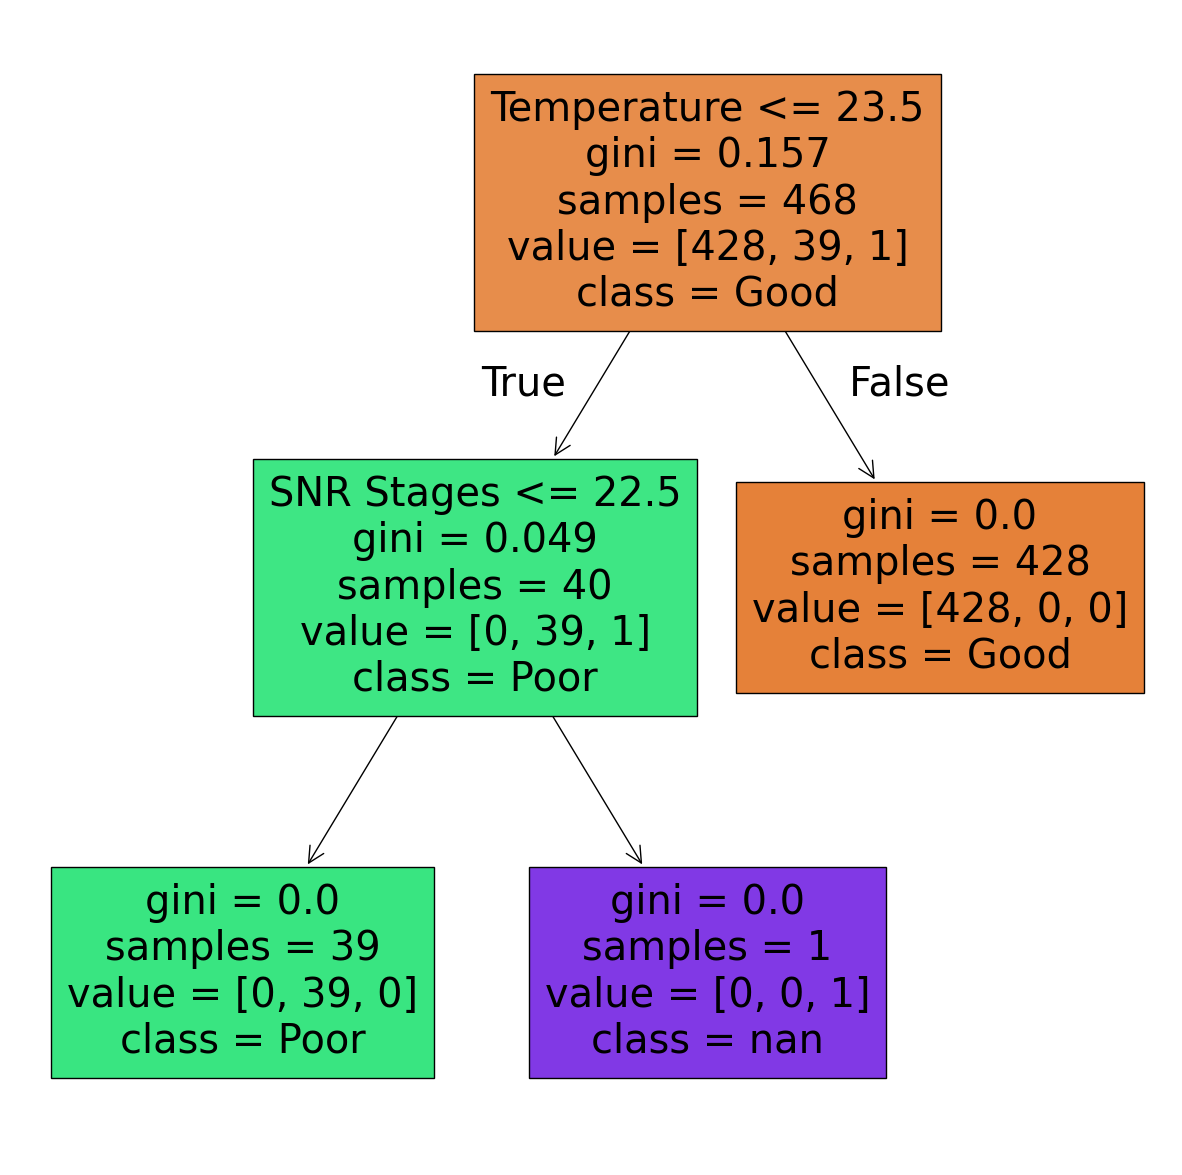

In [14]:
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=X_train_enc.columns, class_names=clf.classes_)
plt.show()